# Simpler CNN 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from plotImages import plot_random_images

import cv2

In [2]:
def load_images_and_labels(directory, target_size):
    images = []
    labels = []  

    for label, class_dir in enumerate(['fake_ImgToImg', 'real']):
        class_dir_path = os.path.join(directory, class_dir)
        for file_name in os.listdir(class_dir_path):
            img_path = os.path.join(class_dir_path, file_name)
            img = load_img(img_path, color_mode="grayscale", target_size=target_size, keep_aspect_ratio=True)
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)

In [3]:
target_size = 128

In [4]:
# Lade Bilder und Labels
directory_path = '../images/car'  # Pfad zum Hauptordner
images, labels = load_images_and_labels(directory_path, (target_size, target_size))

unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique, counts))

# Bestimmung des kleineren Datasets
min_count = min(label_counts.values())
balanced_indices = []

# Datenreduktion für jede Kategorie
for label in unique:
    label_indices = np.where(labels == label)[0]
    selected_indices = np.random.choice(label_indices, min_count, replace=False)
    balanced_indices.extend(selected_indices)

# Reduzierte Bilder und Labels
balanced_images = images[balanced_indices]
balanced_labels = labels[balanced_indices]

# Teile die reduzierten Daten in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Initialisiere ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1.0/255)
test_data_gen = ImageDataGenerator(rescale=1.0/255)

# Erstelle Trainings- und Testdatensätze mit dem ImageDataGenerator
train_Dataset = train_data_gen.flow(X_train, y_train, batch_size=4)
test_Dataset = test_data_gen.flow(X_test, y_test, batch_size=4, shuffle=False)

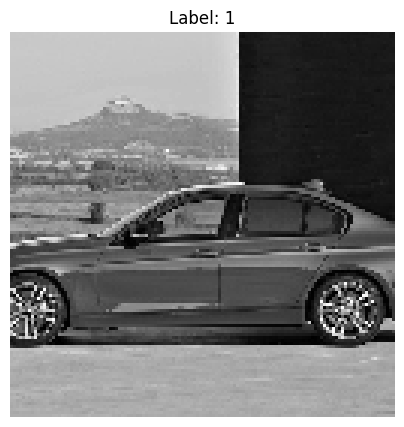

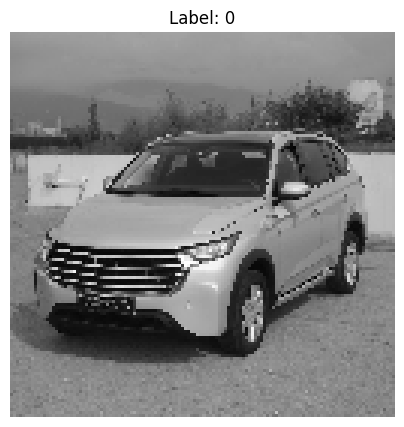

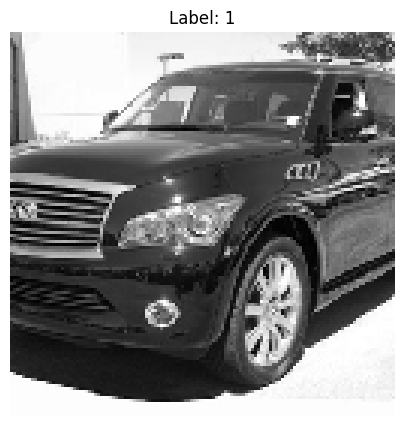

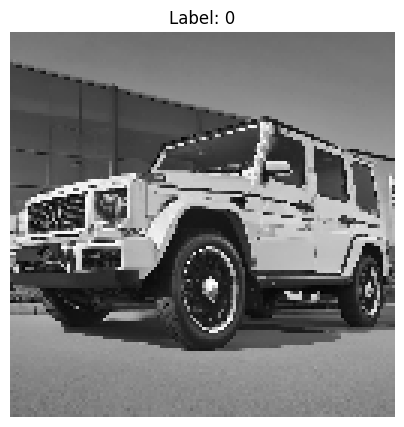

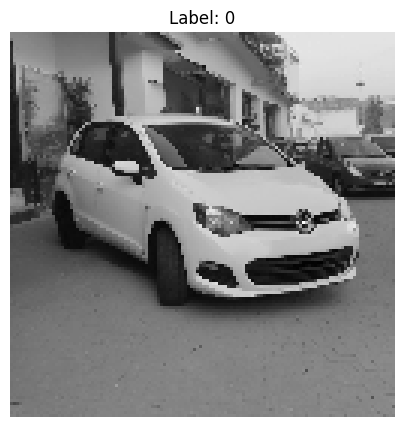

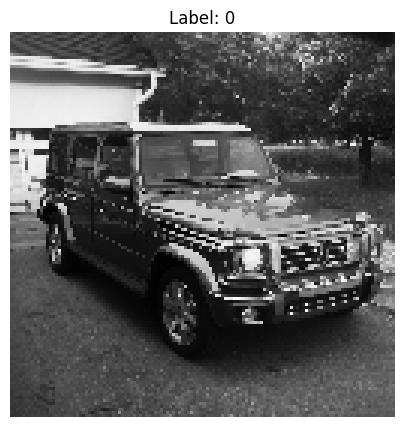

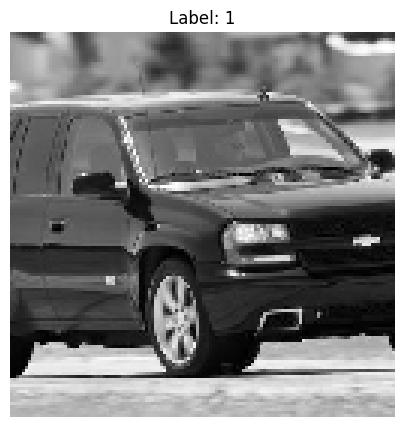

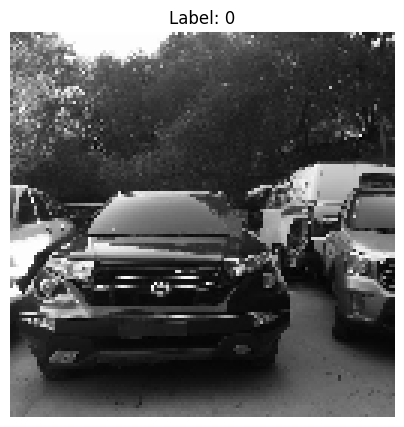

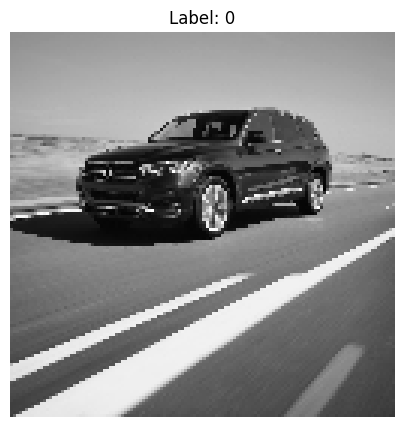

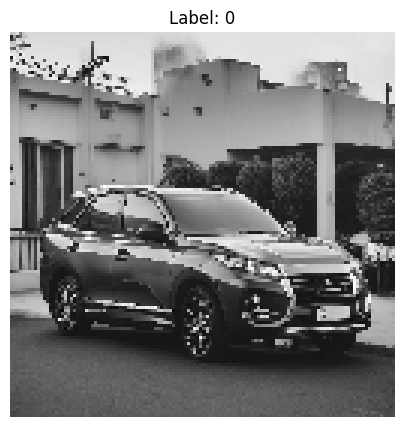

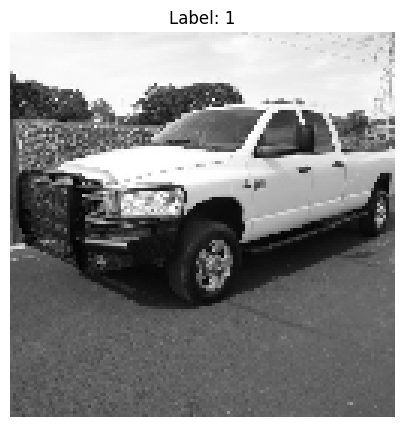

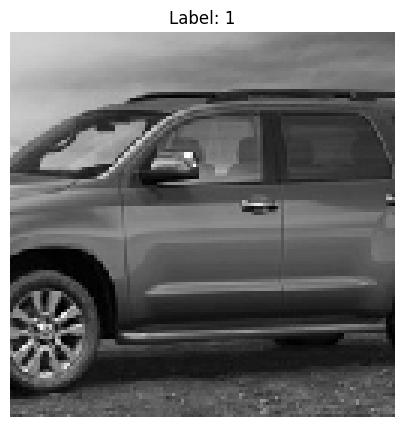

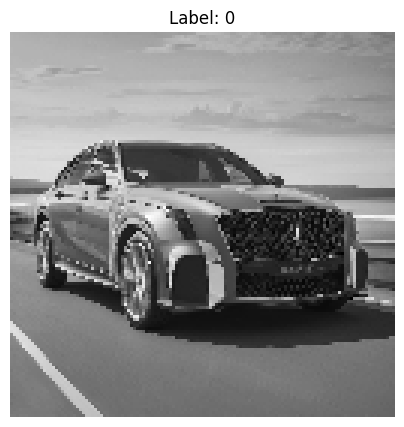

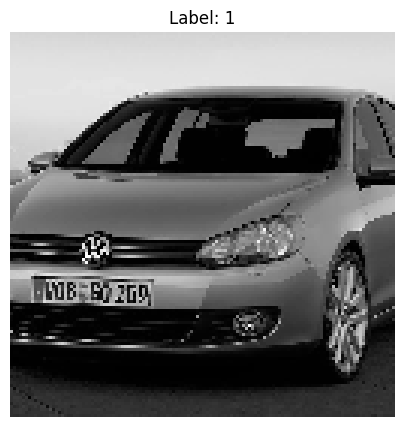

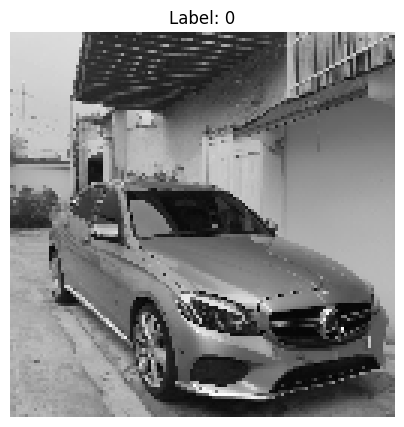

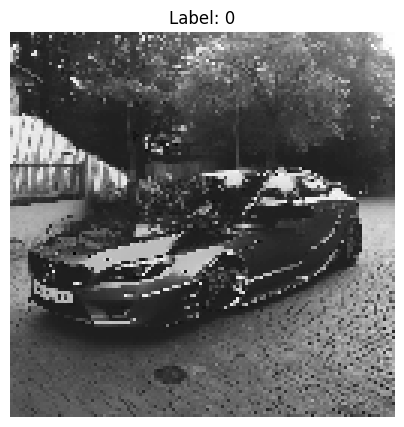

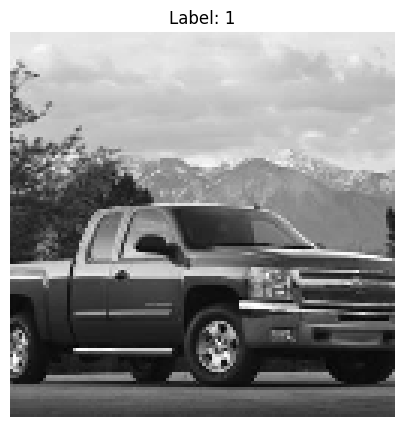

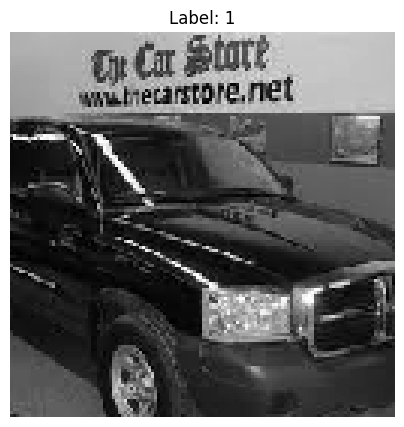

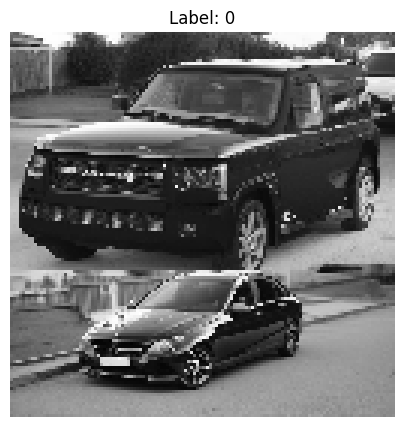

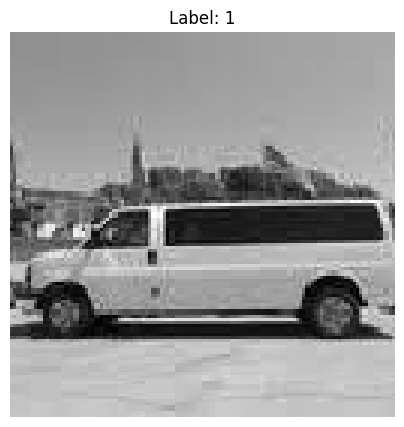

In [5]:
plot_random_images(train_Dataset, 20)

In [6]:
# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size, target_size, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout for regularization
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [7]:
# Save best model
weight_path = './checkpoint_simple_cnn/'

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    monitor = 'val_accuracy'
)

In [8]:
history = model.fit(train_Dataset, 
                    epochs=2, 
                    validation_data=test_Dataset,
                    callbacks=[model_checkpoint]
                   )

Epoch 1/2
322/322 [==============================] - 27s 81ms/step - loss: 0.4785 - accuracy: 0.7481 - val_loss: 0.6878 - val_accuracy: 0.7795
Epoch 2/2
322/322 [==============================] - 26s 81ms/step - loss: 0.3025 - accuracy: 0.8764 - val_loss: 0.2197 - val_accuracy: 0.9193


In [9]:
# load best weights to model
model.load_weights(weight_path)

# make prediction
predictions = model.predict(test_Dataset)

81/81 [==============================] - 1s 11ms/step


In [10]:
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       175
           1       0.98      0.84      0.91       147

    accuracy                           0.92       322
   macro avg       0.93      0.91      0.92       322
weighted avg       0.93      0.92      0.92       322



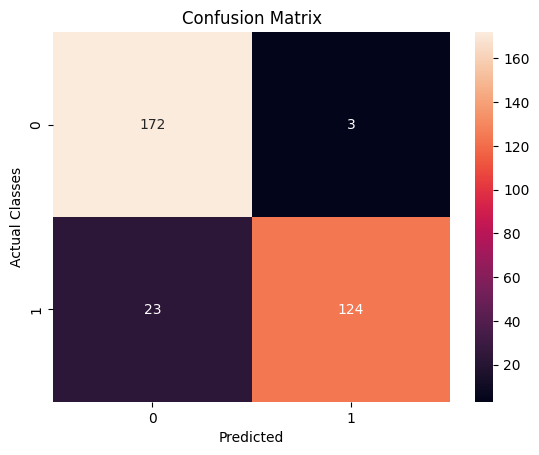

In [11]:
sns.heatmap(confusion_matrix(y_test, binary_predictions), annot=True, fmt='d')

# Print classification report
print(classification_report(y_test, binary_predictions))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Classes')
plt.show()